# Selección de Características: Numérico


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

## Boston Housing Dataset

El Boston Housing [Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) contiene información recolecatada por el Servicio de Censo de EE.UU. concerniente a las viviendas en el área de Boston Mass. El objetivo de este dataset es la predicción del precio promedio de una viviendo en esta área.

In [3]:
boston_raw = load_boston()
boston = pd.DataFrame(boston_raw.data, columns = boston_raw.feature_names)
                                                #boston_raw["feature_names"]
    
boston['Price'] = boston_raw.target
                 #boston_raw["target"]
boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(boston_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [22]:
boston_raw

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [5]:
print(boston_raw["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston_raw["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Se dividen las variables de entrada y la de salida

In [7]:
data = boston_raw.data # X variables independientes
target = boston_raw.target # Y precio: variable dependiente para determinar la regresión

Y luego entre datos de entrenamiento y de prueba

In [8]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=.2, random_state=0)

In [9]:
print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)

Train: (404, 13) (404,)
Test:  (102, 13) (102,)


### [KBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) con Correlación de Pearson
La correlación permite medir el cambio de dos variables en conjunto. Una de las correlaciones más comunes es la de Pearson. El coeficiente Pearson es una medida de dependencia lineal entre dos cariables aleatorias.  Es decir entonces, supone una distribución Gaussiana para cada variable y devuelve la relación lineal entre ellas. En el caso de predictores numéricos, lo usual es usar este tipo de estadísticas. 

`SelectKBest` permite seleccionar las $k$ características más relevantes, es decir, las características con mayor dependencia a la variable objetivo.

In [10]:
feature_selector = SelectKBest(score_func=f_regression, k=8)
feature_selector.fit(data_train, target_train)

SelectKBest(k=8, score_func=<function f_regression at 0x7f2d658d57a0>)

Con la función de `transform()` seleccionamos de nuestro conjunto original de características aquellas $k$ primeras que fueron seleccionadas de acuerdo a lo definido en el selector.

In [11]:
data_train_fs = feature_selector.transform(data_train)
data_test_fs = feature_selector.transform(data_test)

In [12]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_fs.shape)
print("Test Transformado: ", data_test_fs.shape)

Train Original:     (404, 13)
Test Original:      (102, 13)
Train Transformado: (404, 8)
Test Transformado:  (102, 8)


In [13]:
feature_selector.scores_

array([ 81.77212064,  81.1475855 , 153.00493431,  13.09583263,
       107.63575126, 397.33191725,  82.83387891,  34.46704936,
        88.68548609, 142.08609712, 187.10308463,  57.67850087,
       535.13194094])

Independiente de la cantidad de características seleccionadas, los resultados de la función de calificación pueden ser visualizados.

In [14]:
# Iterando por sobre todas las características e imprimiendo la calificación correspondiente
print("Score obtenido de cada característica (mayor es mejor)")
print("============================================================")
for i in range(len(feature_selector.scores_)):
    print("Característica {:2d}: {:10f}".format(i, feature_selector.scores_[i]))

Score obtenido de cada característica (mayor es mejor)
Característica  0:  81.772121
Característica  1:  81.147585
Característica  2: 153.004934
Característica  3:  13.095833
Característica  4: 107.635751
Característica  5: 397.331917
Característica  6:  82.833879
Característica  7:  34.467049
Característica  8:  88.685486
Característica  9: 142.086097
Característica 10: 187.103085
Característica 11:  57.678501
Característica 12: 535.131941


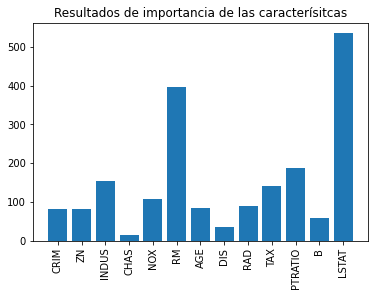

In [15]:
# Gráfica de barras con el nombre de las características y la calificación obtenida
plt.bar([boston.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.xticks(rotation=90)
plt.title("Resultados de importancia de las caracterísitcas")
plt.show()

### [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
La Eliminación Recursiva de Características (RFE por sus siglas en inglés) es u algoritmo de búsqueda de características que utiliza un modelo de predicción para realizar un ajuste, establece el órden de importancia de las variables y elimina la menos relevante. Posteriormente, vuelve a clasificar el modelo con las características restantes y repite el proceso iterativamente hasta que queden el número deseado de variables de entradas.

Para este ejemplo, se utiliza un modelo de regresión lineal que acepta valores numéricos de entrada y produce un valor numérico de salida. Otra opción viable son árboles de decisión como regresores.

In [16]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(data_train, target_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [17]:
data_train_rfe = rfe.transform(data_train)
data_test_rfe = rfe.transform(data_test)

In [18]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_rfe.shape)
print("Test Transformado: ", data_test_rfe.shape)

Train Original:     (404, 13)
Test Original:      (102, 13)
Train Transformado: (404, 8)
Test Transformado:  (102, 8)


In [19]:
rfe.ranking_

array([1, 2, 5, 1, 1, 1, 6, 1, 1, 3, 1, 4, 1])

In [20]:
boston_raw.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
# Iterando por sobre todas las características e imprimiendo la clasificación correspondiente
print("Clasifiación de cada característica (menor es mejor)")
print("====================================================")
for i in range(len(rfe.ranking_)):
    print("Característica {:d}: {:d}".format(i, rfe.ranking_[i]))

Clasifiación de cada característica (menor es mejor)
Característica 0: 1
Característica 1: 2
Característica 2: 5
Característica 3: 1
Característica 4: 1
Característica 5: 1
Característica 6: 6
Característica 7: 1
Característica 8: 1
Característica 9: 3
Característica 10: 1
Característica 11: 4
Característica 12: 1


> Código basado en el libro _**Data Preparation for Machine Learning:** Data Cleaning, Feature Selection, and Data Transforms in Python_ por Jason Brownlee.